# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Sensitivity Soil Dataset](https://www.kaggle.com/datasets/willianoliveiragibin/sensitivity-soil-nutrient-pools)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

/kaggle/input/sensitivity-soil-nutrient-pools/Sensitivity_Soil_Nutrient_Pools new.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Sensitivity_Soil_Nutrient_Pools new.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,SampleID,site,block,paddock,plot,slope,rainfall_reduction,grazing_treatment,year,type,faith_pd
0,GMDR-FK-2018-4,FK,1,1,4,4,0,stable,2018,bacteria,3.912.908.739
1,GMDR-TB-2018-45,TB,3,2,45,2,50,heavy,2018,bacteria,3.298.556.468
2,GMDR-TB-2018-8,TB,1,3,8,1,75,destock,2018,bacteria,3.332.257.877
3,GMDR-TB-2018-31,TB,2,3,31,4,99,destock,2018,bacteria,3.806.342.641
4,GMDR-TB-2018-23,TB,2,2,23,6,0,heavy,2018,bacteria,4.135.953.774


## last Five row

In [4]:
df.tail()

,SampleID,site,block,paddock,plot,slope,rainfall_reduction,grazing_treatment,year,type,faith_pd
1001,GMDR-FK-2022-23,FK,2,1,23,1,0,destock,2022,fungi,2.229.139.198
1002,GMDR-FK-2022-20,FK,2,1,20,2,0,destock,2022,fungi,1.572.091.467
1003,GMDR-TB-2022-49,TB,3,1,49,4,50,stable,2022,fungi,3.400.527.221
1004,GMDR-FK-2022-52,FK,3,3,52,2,0,heavy,2022,fungi,1.679.936.128
1005,GMDR-TB-2022-50,TB,3,1,50,4,25,stable,2022,fungi,3.077.840.854


## Shape of our dataset

In [5]:
df.shape

(1006, 11)

## List out all columns

In [6]:
df.columns

Index(['SampleID', 'site', 'block', 'paddock', 'plot', 'slope',
       'rainfall_reduction', 'grazing_treatment', 'year', 'type', 'faith_pd'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

SampleID              object
site                  object
block                  int64
paddock                int64
plot                   int64
slope                  int64
rainfall_reduction     int64
grazing_treatment     object
year                   int64
type                  object
faith_pd              object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SampleID            1006 non-null   object
 1   site                1006 non-null   object
 2   block               1006 non-null   int64 
 3   paddock             1006 non-null   int64 
 4   plot                1006 non-null   int64 
 5   slope               1006 non-null   int64 
 6   rainfall_reduction  1006 non-null   int64 
 7   grazing_treatment   1006 non-null   object
 8   year                1006 non-null   int64 
 9   type                1006 non-null   object
 10  faith_pd            1006 non-null   object
dtypes: int64(6), object(5)
memory usage: 86.6+ KB


## Check Null Value

In [9]:
df.isnull().sum()

SampleID              0
site                  0
block                 0
paddock               0
plot                  0
slope                 0
rainfall_reduction    0
grazing_treatment     0
year                  0
type                  0
faith_pd              0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,block,paddock,plot,slope,rainfall_reduction,year
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,1.997018,2.005964,27.485089,3.037773,41.165010,2019.930417
std,0.817100,0.816475,15.529054,1.569791,36.765529,1.378993
min,1.000000,1.000000,1.000000,1.000000,0.000000,2018.000000
25%,1.000000,1.000000,14.000000,2.000000,0.000000,2019.000000
50%,2.000000,2.000000,27.500000,3.000000,25.000000,2020.000000
75%,3.000000,3.000000,41.000000,4.000000,75.000000,2021.000000
max,3.000000,3.000000,54.000000,6.000000,99.000000,2022.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

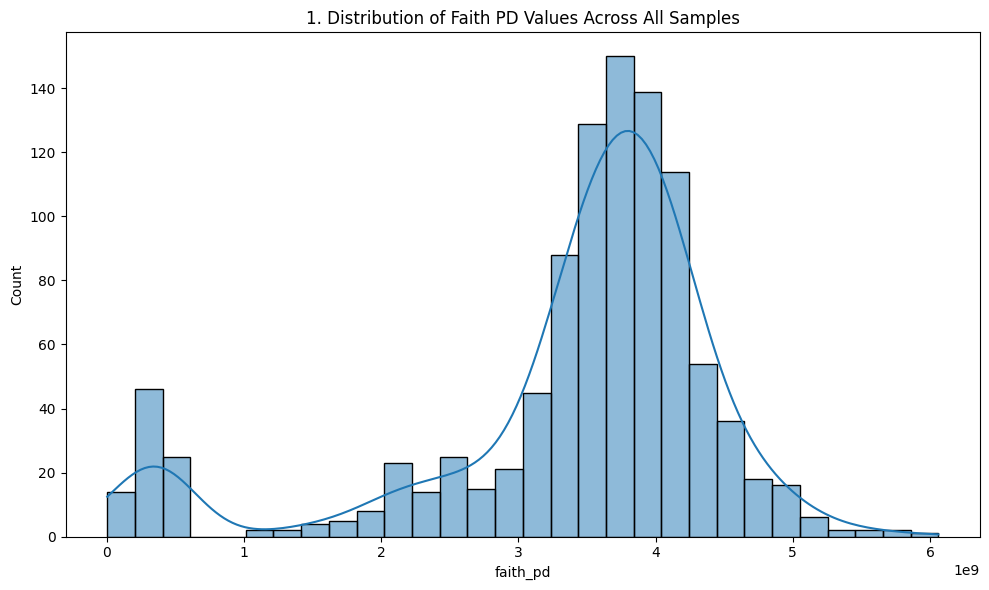

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Faith PD Values Across All Samples')
show_fig()
plot_no += 1


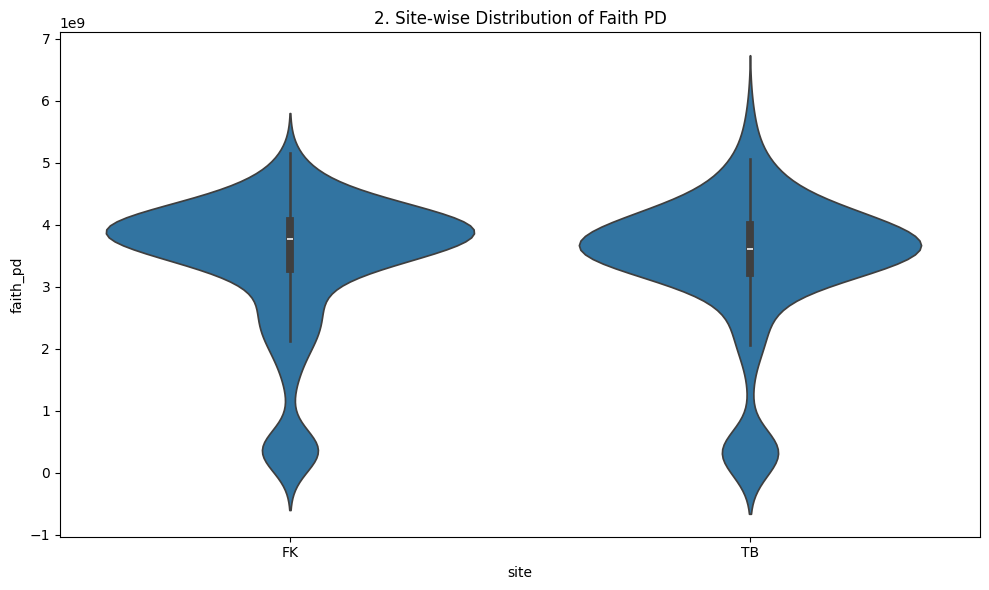

In [14]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='site', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), data=df)
plt.title(f'{plot_no}. Site-wise Distribution of Faith PD')
show_fig()
plot_no += 1


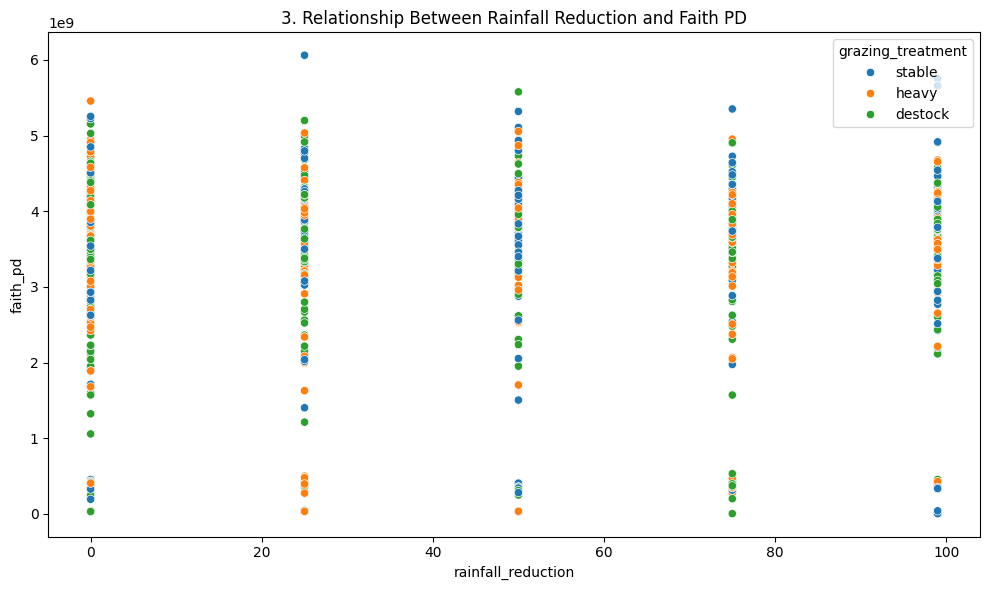

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='rainfall_reduction', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), hue='grazing_treatment', data=df)
plt.title(f'{plot_no}. Relationship Between Rainfall Reduction and Faith PD')
show_fig()
plot_no += 1


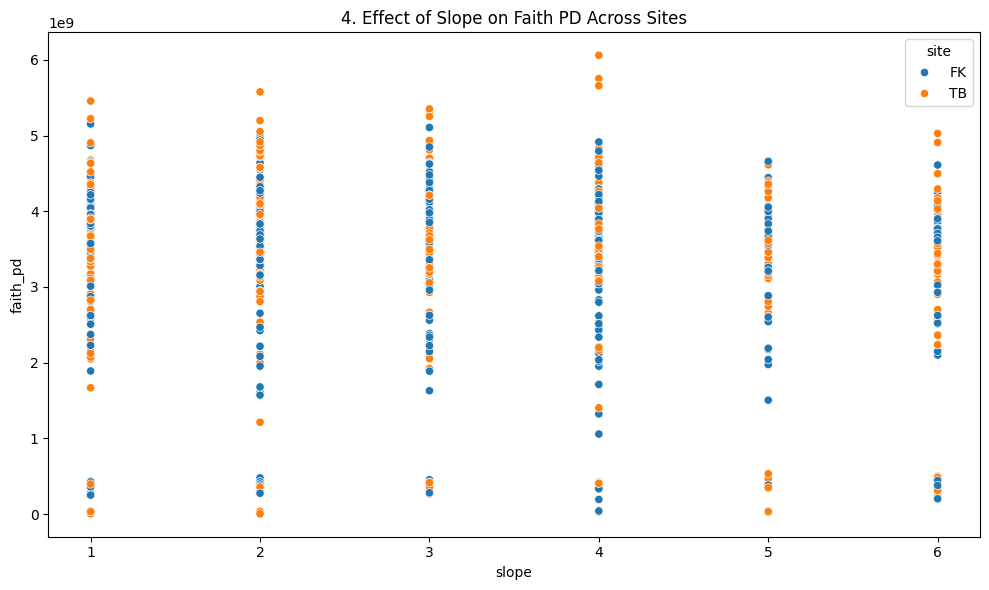

In [16]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='slope', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), hue='site', data=df)
plt.title(f'{plot_no}. Effect of Slope on Faith PD Across Sites')
show_fig()
plot_no += 1


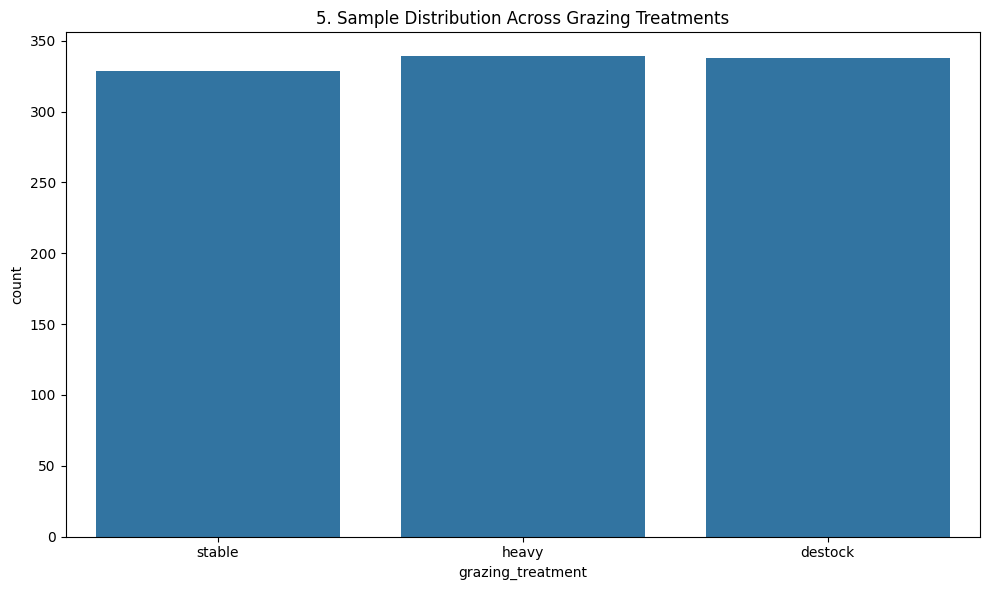

In [17]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='grazing_treatment', data=df)
plt.title(f'{plot_no}. Sample Distribution Across Grazing Treatments')
show_fig()
plot_no += 1


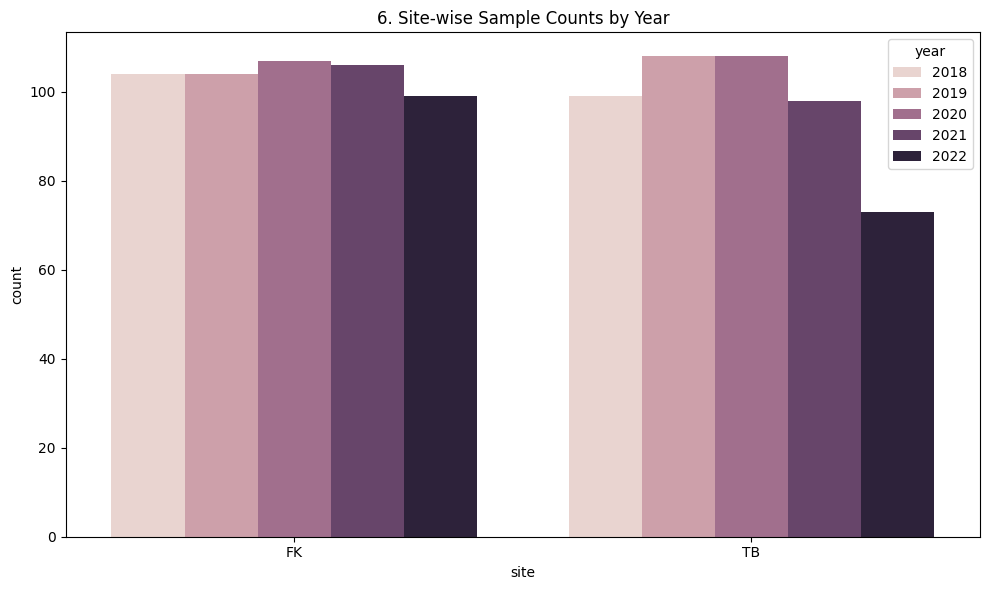

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='site', hue='year', data=df)
plt.title(f'{plot_no}. Site-wise Sample Counts by Year')
show_fig()
plot_no += 1


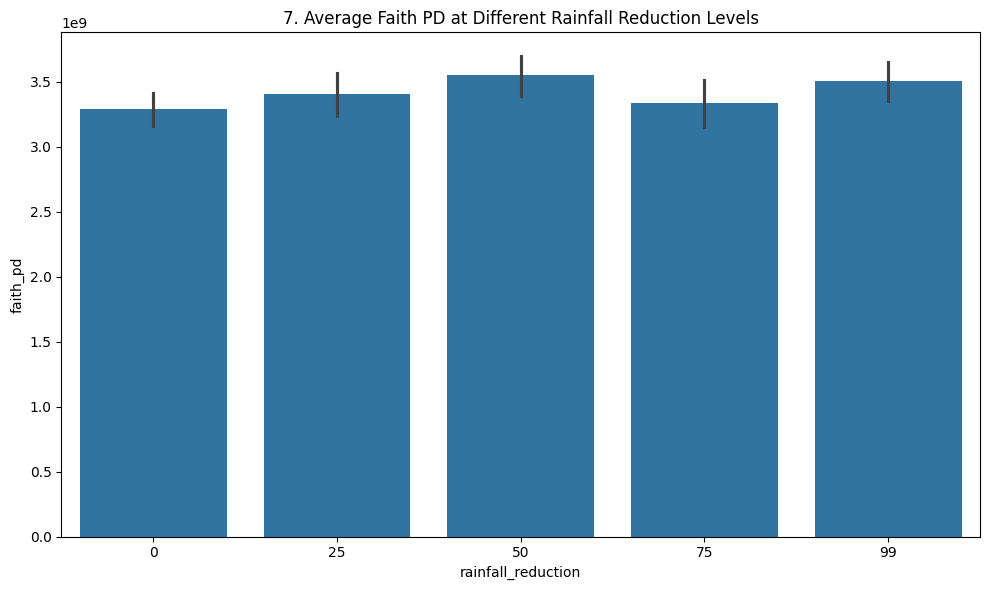

In [19]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='rainfall_reduction', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), data=df, estimator='mean')
plt.title(f'{plot_no}. Average Faith PD at Different Rainfall Reduction Levels')
show_fig()
plot_no += 1


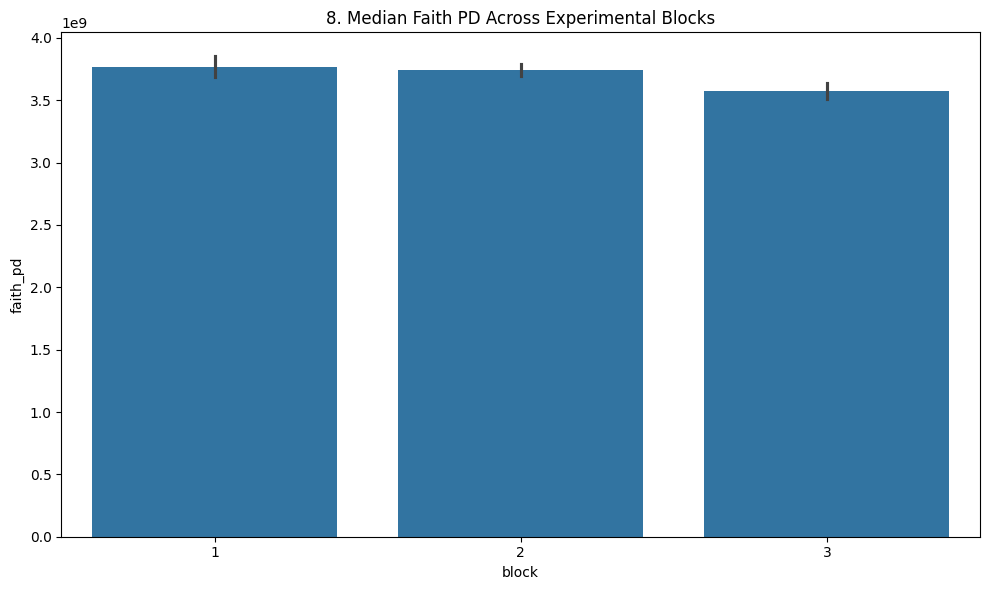

In [20]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='block', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), data=df, estimator='median')
plt.title(f'{plot_no}. Median Faith PD Across Experimental Blocks')
show_fig()
plot_no += 1


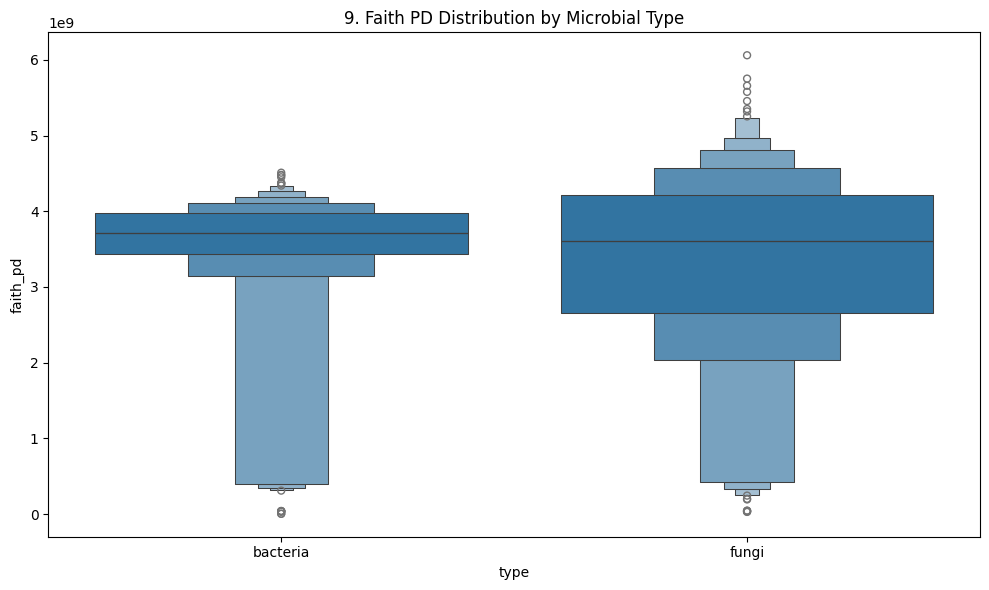

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxenplot(x='type', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), data=df)
plt.title(f'{plot_no}. Faith PD Distribution by Microbial Type')
show_fig()
plot_no += 1


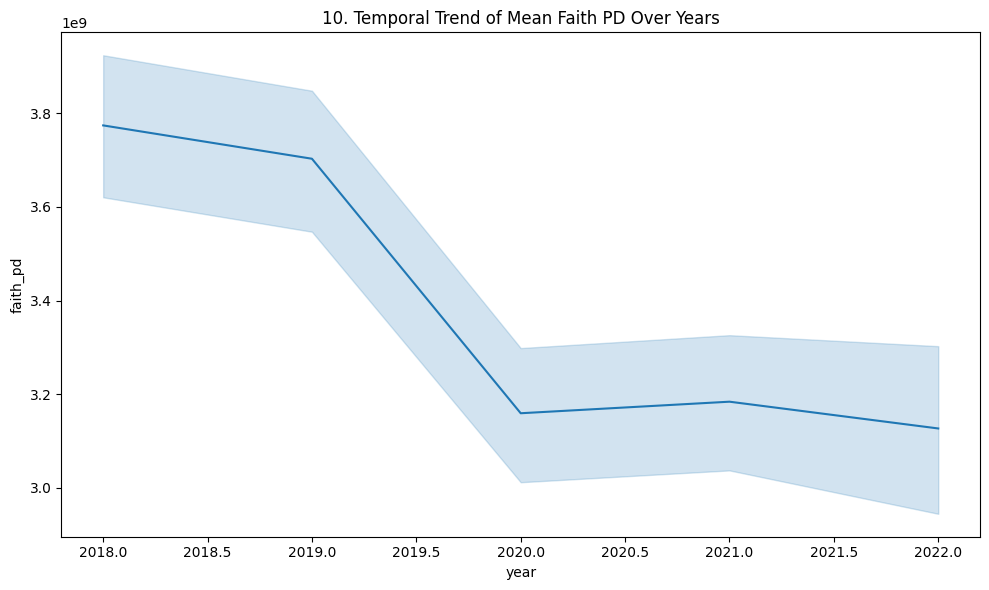

In [22]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='year', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), data=df, estimator='mean')
plt.title(f'{plot_no}. Temporal Trend of Mean Faith PD Over Years')
show_fig()
plot_no += 1


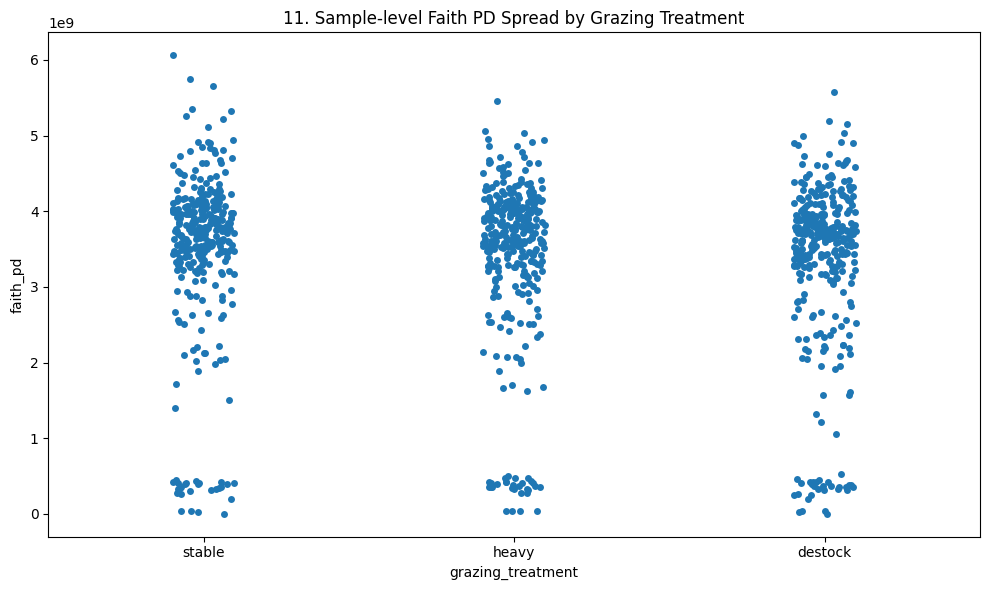

In [23]:
fig = plt.figure(figsize=(10,6))
sns.stripplot(x='grazing_treatment', y=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), data=df, jitter=True)
plt.title(f'{plot_no}. Sample-level Faith PD Spread by Grazing Treatment')
show_fig()
plot_no += 1


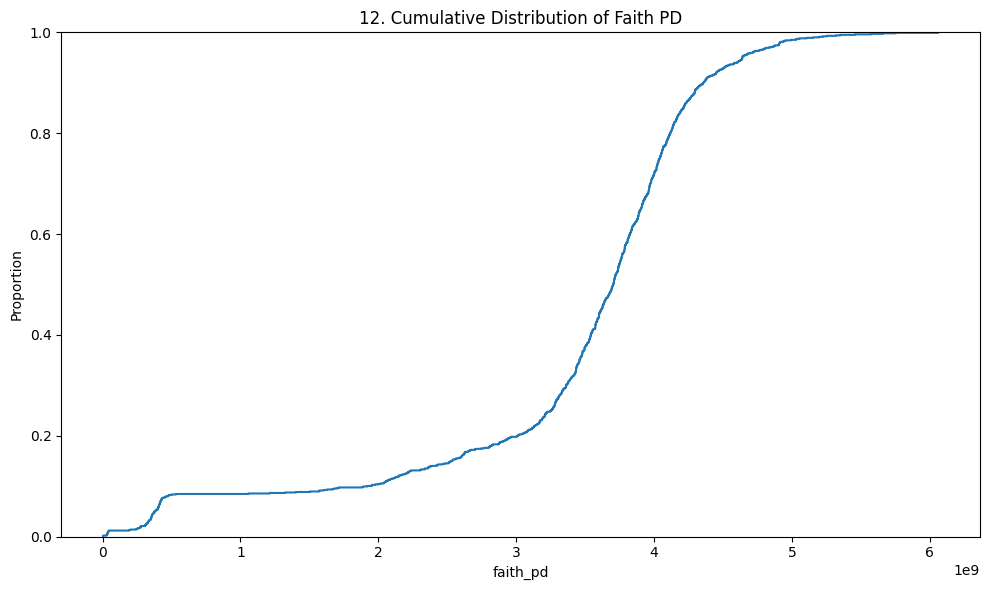

In [24]:
fig = plt.figure(figsize=(10,6))
sns.ecdfplot(pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)))
plt.title(f'{plot_no}. Cumulative Distribution of Faith PD')
show_fig()
plot_no += 1


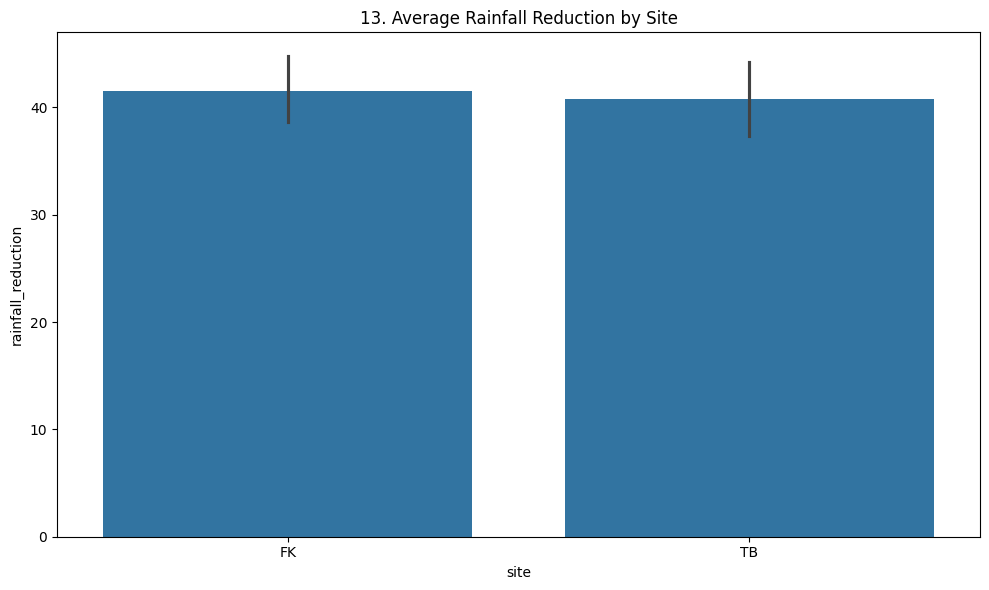

In [25]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='site', y='rainfall_reduction', data=df, estimator='mean')
plt.title(f'{plot_no}. Average Rainfall Reduction by Site')
show_fig()
plot_no += 1


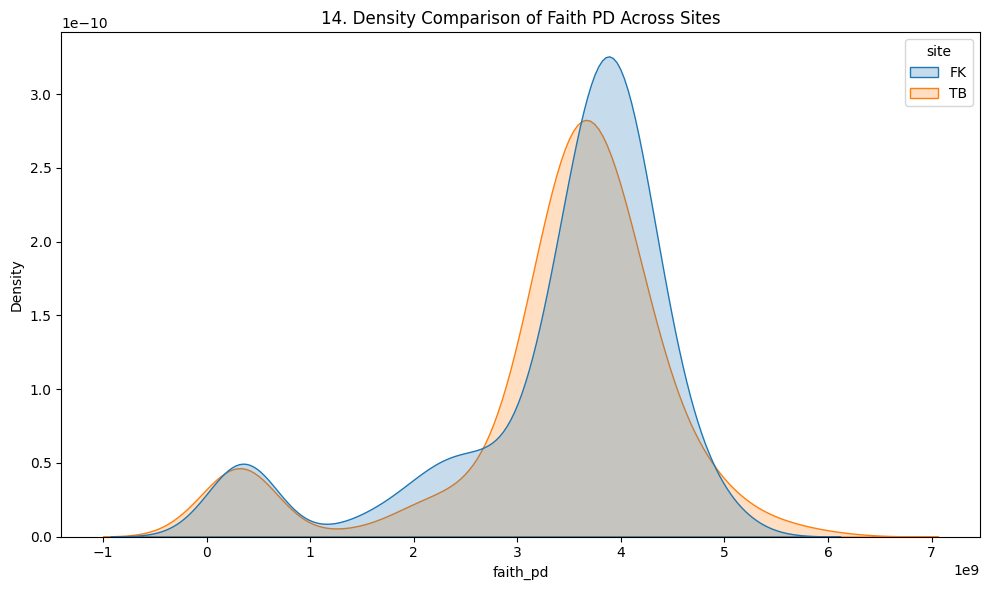

In [26]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False)), hue=df['site'], fill=True)
plt.title(f'{plot_no}. Density Comparison of Faith PD Across Sites')
show_fig()
plot_no += 1


In [27]:
corr = df.assign(
    faith_pd=pd.to_numeric(df['faith_pd'].astype(str).str.replace('.', '', regex=False))
).select_dtypes(include='number').corr()

corr


,block,paddock,plot,slope,rainfall_reduction,year,faith_pd
block,1.000000,0.000027,0.942851,0.256082,-0.000050,-0.006366,-0.059300
paddock,0.000027,1.000000,0.118979,-0.207457,-0.004143,-0.003166,0.019086
plot,0.942851,0.118979,1.000000,0.273215,-0.009379,-0.006832,-0.037042
slope,0.256082,-0.207457,0.273215,1.000000,-0.000056,-0.009357,-0.058985
rainfall_reduction,-0.000050,-0.004143,-0.009379,-0.000056,1.000000,-0.025483,0.056597
year,-0.006366,-0.003166,-0.006832,-0.009357,-0.025483,1.000000,-0.225224
faith_pd,-0.059300,0.019086,-0.037042,-0.058985,0.056597,-0.225224,1.000000


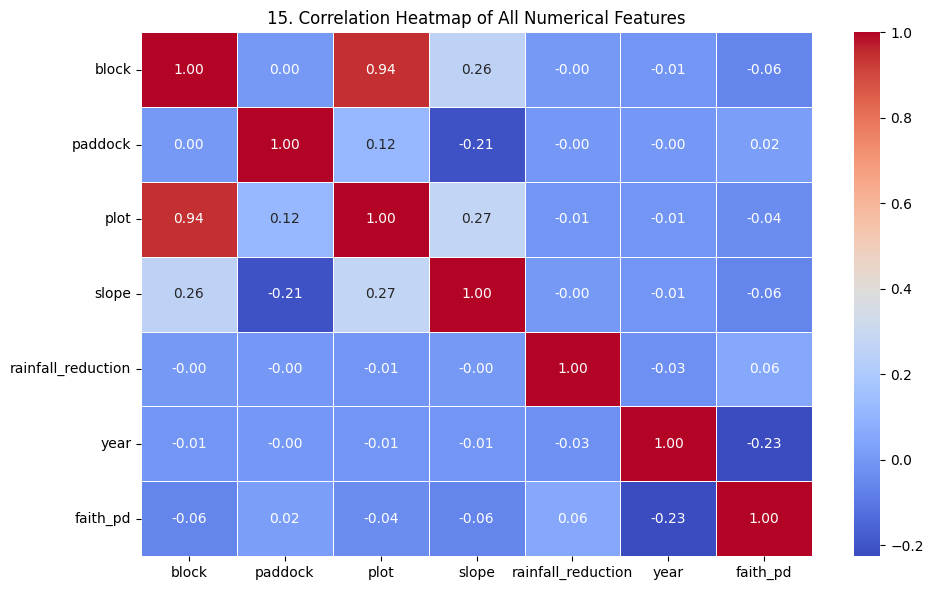

In [28]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'{plot_no}. Correlation Heatmap of All Numerical Features')
show_fig()
plot_no += 1


# Model Training

## Create working copy of data

In [29]:
df_ml = df.copy()

## Convert target column to numeric

In [30]:
df_ml['faith_pd'] = pd.to_numeric(
    df_ml['faith_pd'].astype(str).str.replace('.', '', regex=False)
)

## Apply log transformation to reduce scale imbalance

In [31]:
df_ml['faith_pd_log'] = np.log1p(df_ml['faith_pd'])

## Encode categorical variables

In [32]:
df_ml = pd.get_dummies(
    df_ml, columns=['site', 'grazing_treatment', 'type'], drop_first=True
)

## Separate features and target

In [33]:
X = df_ml.drop(columns=['faith_pd', 'faith_pd_log', 'SampleID'])
y = df_ml['faith_pd_log']

## Split into train and test sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Scale features for distance-based models

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define supervised regression models

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "SVR (RBF Kernel)": SVR(C=100, gamma=0.1, epsilon=0.01),
    "KNN Regression": KNeighborsRegressor(n_neighbors=7)
}

## Train and evaluate models

In [37]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    results[name] = {
        "R2 Score": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

## Display accuracy of all trained models

In [38]:
results_df = pd.DataFrame(results).T
results_df

,R2 Score,RMSE
Linear Regression,-0.069295,1.201936e+09
Ridge Regression,-0.069576,1.202093e+09
SVR (RBF Kernel),-0.412925,1.381630e+09
KNN Regression,-0.242345,1.295548e+09


## Select best-performing model

In [39]:
best_model = SVR(C=100, gamma=0.1, epsilon=0.01)

## Train best model

In [40]:
best_model.fit(X_train, y_train)

SVR(C=100, epsilon=0.01, gamma=0.1)

## Predict and reverse log transformation

In [41]:
y_pred_final = np.expm1(best_model.predict(X_test))
y_test_final = np.expm1(y_test)

## Plot improved Actual vs Predicted results

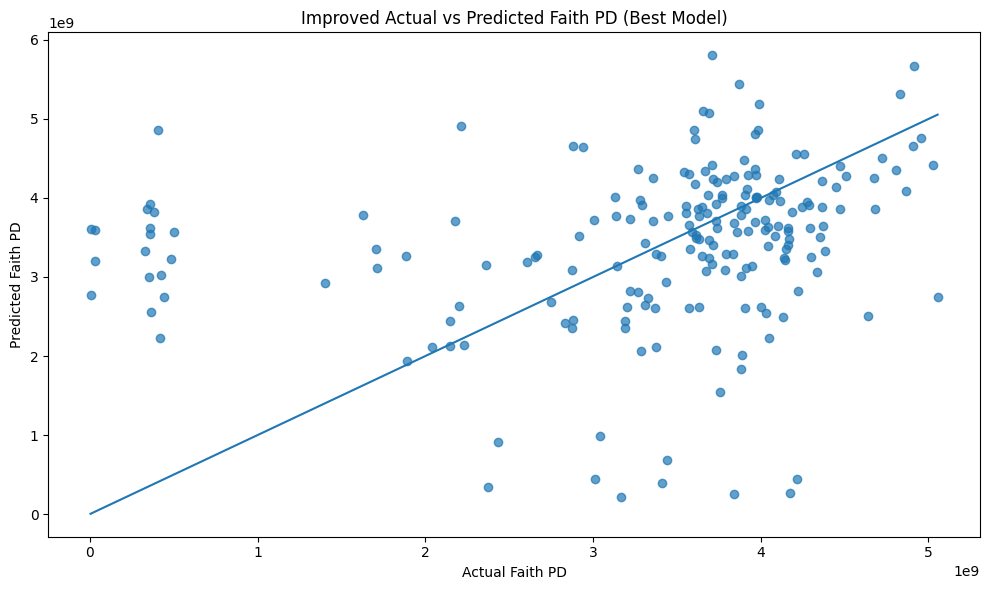

In [42]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test_final, y_pred_final, alpha=0.7)
plt.plot(
    [y_test_final.min(), y_test_final.max()],
    [y_test_final.min(), y_test_final.max()]
)
plt.title('Improved Actual vs Predicted Faith PD (Best Model)')
plt.xlabel('Actual Faith PD')
plt.ylabel('Predicted Faith PD')
plt.tight_layout()
plt.show()